## Exercício 1 - Dataset Digits do sklearn

In [ ]:
# 1) Importar o pacote "sklearn.datasets" e o "load_digits"
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 2) Carregar o dataset através do método: load_digits()
digits = datasets.load_digits()

# 3) Observe as keys do dataset usando o método "keys"
digits.keys()

# 4) A chave "data" são as features e a chave "target" é o y. Separe os dados em 2 variáveis diferentes
X = digits['data']
y = digits['target']

# 5) Separe o conjunto de dados em treinamento e teste usando o método: "train_test_split"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)

In [ ]:
# 6) Treinar o K-Means, sendo o K seja igual ao número de classes do dataset
import pandas as pd
clusters = len(pd.DataFrame(y_train).value_counts()) #Descobre a quantidade de clusters
#clusters = 15 #testanto com 15 para melhorar a taxa de acerto, essa linha pode ser comentada para usar apenas a linha anterior

model = KMeans(n_clusters = clusters)
model.fit(X_train) #Treina o modelo apenas com o X_train, pois o aprendizado é não supervisionado

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
# Pega as labels do modelo trinado
from collections import Counter

labels = model.labels_
map_labels = []

# Iniciliaza uma lista com uma quantidade igual ao valor de clustrs de listas
for i in range(clusters):
  map_labels.append([])

for i in range(len(y_train)):
  for c in range(clusters):
    if(labels[i]==c):
      map_labels[c].append(y_train[i])

mapping = {}
for i in range(clusters):
  dic = Counter(map_labels[i]) #Retorna um dicionario com as frequencias
  value = dic.most_common(1)[0][0] #Pega a cluster de maior frenquecia no dicionario
  mapping[i] = value


In [ ]:
# 7) Mostrar a taxa de acerto do K-Means
from sklearn import metrics
results = model.predict(X_test)
results = [mapping[i] for i in results]

acc = metrics.accuracy_score(y_test,results)
print("{}%".format(round(acc*100)))

#print(y_test)
#print(results)

79%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

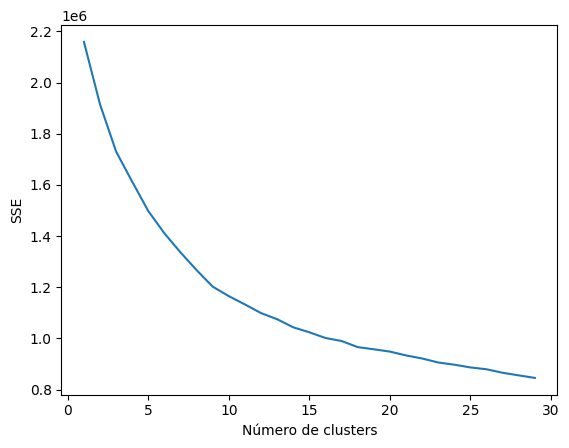

In [ ]:
# 8) Calcular a curva do cotovelo para verificar qual o número ideal de clusters para esse dataset
sse = {}
for k in range(1,30):
  kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(X)
  sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# 9) Calcular o Coeficiente de Silhouette para o K-Means treinado em (7)

score = silhouette_score(X_train, model.labels_, metric = 'euclidean')
print("Coeficiente de Silhouette = %.3f" %score)

Coeficiente de Silhouette = 0.182


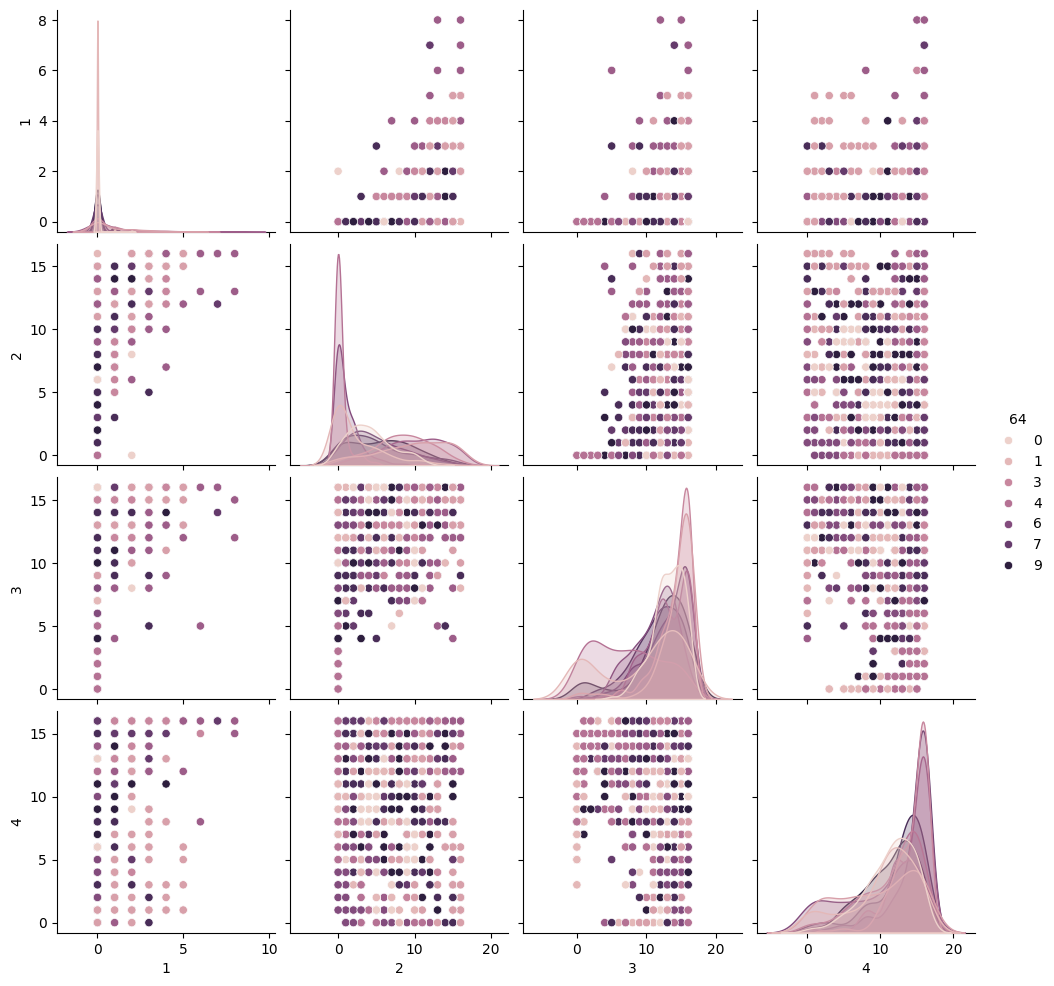

In [ ]:
# 10) É possível melhorar o Coeficiente de Silhouette? Altere o K-Means para conseguir um valor melhor do Coeficiente de Silhouette
import seaborn as sns
import pandas as pd
df = pd.DataFrame(X)
df[64] = y

sns.pairplot(data=df, vars = (1,2,3,4), hue = 64)
#Tenho a impressão de que os dados ficam muito próximos nesse dataset, pela forma que os gráficos aparecem no pairplot do seaborn
#Por isso acho que fica dificil a separação desses dados de modo que o coeficeinte de silhouette não fica tão próximo de 1

## Exercício 2 - Dataset Wine do sklearn

In [ ]:
# 1) Importar o pacote "sklearn.datasets" e o "load_wine"
from sklearn import datasets

# 2) Carregar o dataset através do método: load_wine()
wine = datasets.load_wine()

# 3) Observe as keys do dataset usando o método "keys"
wine.keys()

# 4) A chave "data" são as features e a chave "target" é o y. Separe os dados em 2 variáveis diferentes
X = wine['data']
y = wine['target']

X.shape

# 5) Usar todo o conjunto de dados para treinamento
# 6) Treinar o DBScan. Quantos clusters foram gerados com os parâmetros que vc escolheu?
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=42, min_samples=5)
model.fit(X)


DBSCAN(eps=42)

In [ ]:
import numpy as np
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

In [ ]:
from sklearn import metrics
#np.unique(labels)
# Número de clusters
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de outliers ou ruídos: %d" % n_noise_) # dados que não pertencem a nunhum cluster


Número estimado de clusters: 3
Número estimado de outliers ou ruídos: 8
Índice Silhouette: 0.555


In [ ]:
# 7) Calcular o Coeficiente de Silhouette para o DBScan treinado em (6)
print("Índice Silhouette: %0.3f" % metrics.silhouette_score(X, labels))

Índice Silhouette: 0.555


In [ ]:
# 8) É possível melhorar o Coeficiente de Silhouette? Altere os parâmetros do DBScan para conseguir um valor melhor do coeficiente
#Sim, caso o raio seja pequeno, menor do que 10 por exemplo o coeficeinte de silhuette fica negativo e o numero de clusters fica alto
#Por isso optei por escolher o raio esp = 40, para melhorar o coeficiente de silhuette fica positivo e mais próximo de 1, ademais fica com menos outliers
#Além disso, os dados parecem estar meio afastados, aparentemente o atributo 12 é o principal causador disso, como podemos ver logo abaixo
import pandas as pd
df = pd.DataFrame(X)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


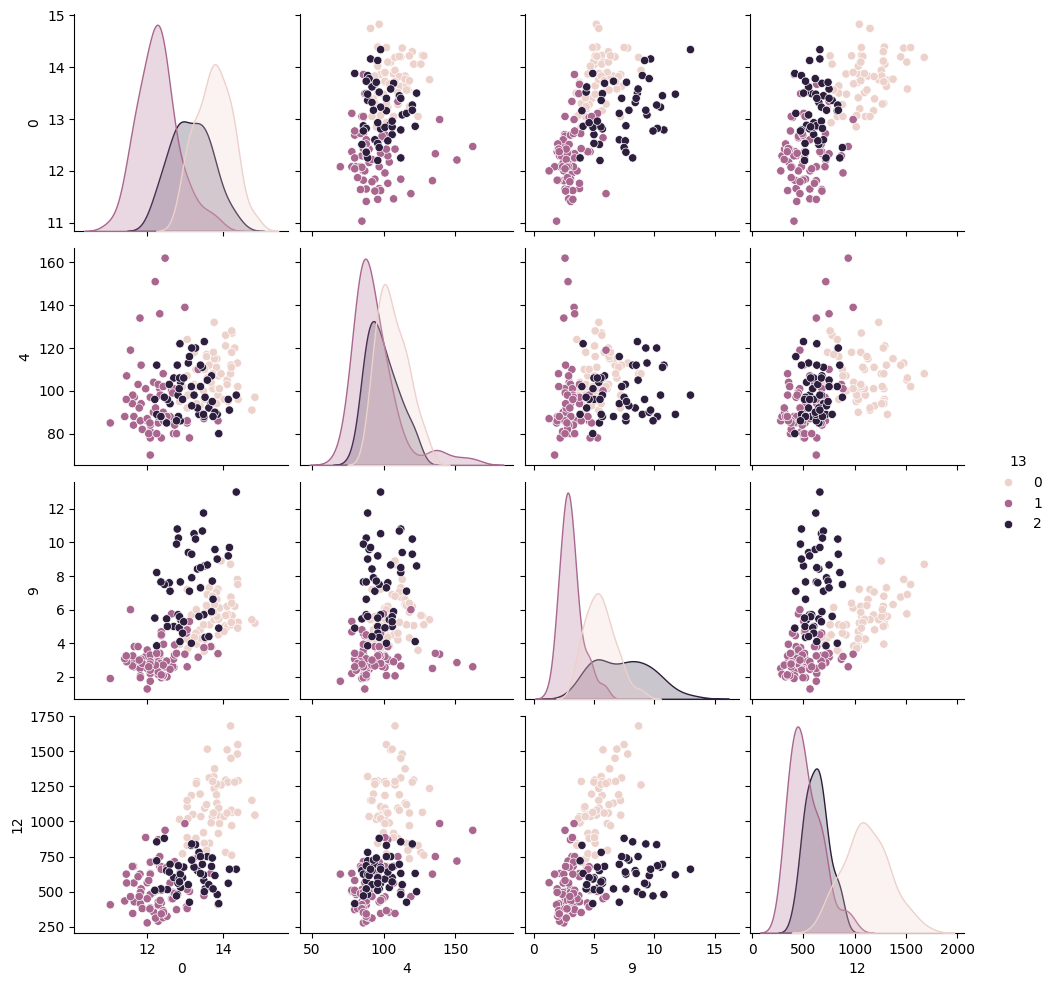

In [ ]:
import seaborn as sns
df[13]=y
sns.pairplot(data = df, vars=(0,4,9,12), hue = 13)